In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Titanic dataset from the given URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

In [3]:
# Select relevant features for clustering
features = ['Age', 'Fare', 'Pclass']

In [4]:
# Drop missing values for the selected features
data_for_clustering = titanic_data[features].dropna()


In [5]:
# Apply KMeans clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_for_clustering['cluster'] = kmeans.fit_predict(data_for_clustering)


C:\Users\squir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
# Merge the clustered data back to the original DataFrame
titanic_data = titanic_data.merge(data_for_clustering[['cluster']], left_index=True, right_index=True, how='left')

In [7]:
# Convert the 'age' column to numeric if it's not already
titanic_data['Age'] = pd.to_numeric(titanic_data['Age'], errors='coerce')

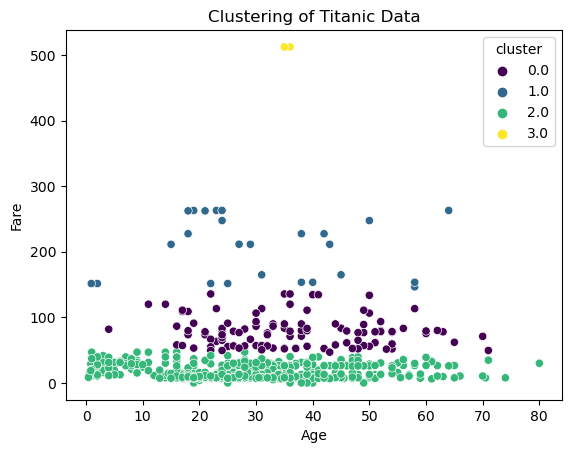

In [8]:

# Plot the clustered data
sns.scatterplot(x='Age', y='Fare', hue='cluster', data=titanic_data.dropna(subset=['Age', 'Fare']), palette='viridis')
plt.title('Clustering of Titanic Data')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()